# 1. Import Libraries and Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# 2. Import data

In [7]:
# Define file path
path = r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Specialization\Part 1\Exercise 1.4'

In [9]:
# Loads the 'Dataset.csv' file from the specified path
climate =pd.read_csv(os.path.join(path, 'DataSet_scaled.csv'))

In [11]:
# Displays the first five rows of the 'climate' DataFrame
climate.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


# 3. Import the pleasant weather data

In [14]:
# Import the pleasant weather data
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [16]:
# Displays the first five rows of the 'pleasantweather' DataFrame
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 4. Remove stations with insufficient data unecessary columns

In [19]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [21]:
# Create an 'X' matrix by dropping the unneeded columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

# 5. Split the data into training and test sets

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 6. K-neighbors application

In [27]:
#Run the model with neighbors equal to 1 to 4
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


# 7. Plot of the relationship between number of neighbors and accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

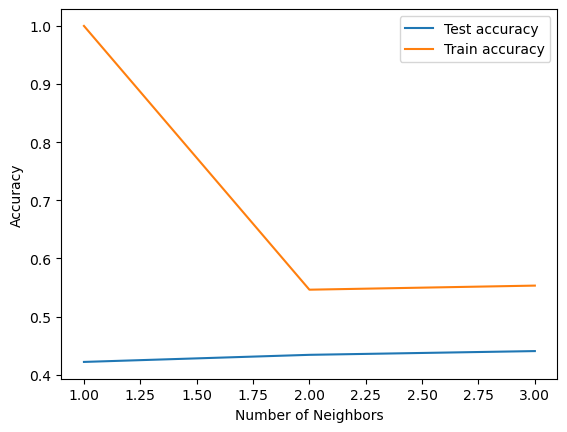

In [30]:
# Plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

# 8. Confusion matrices

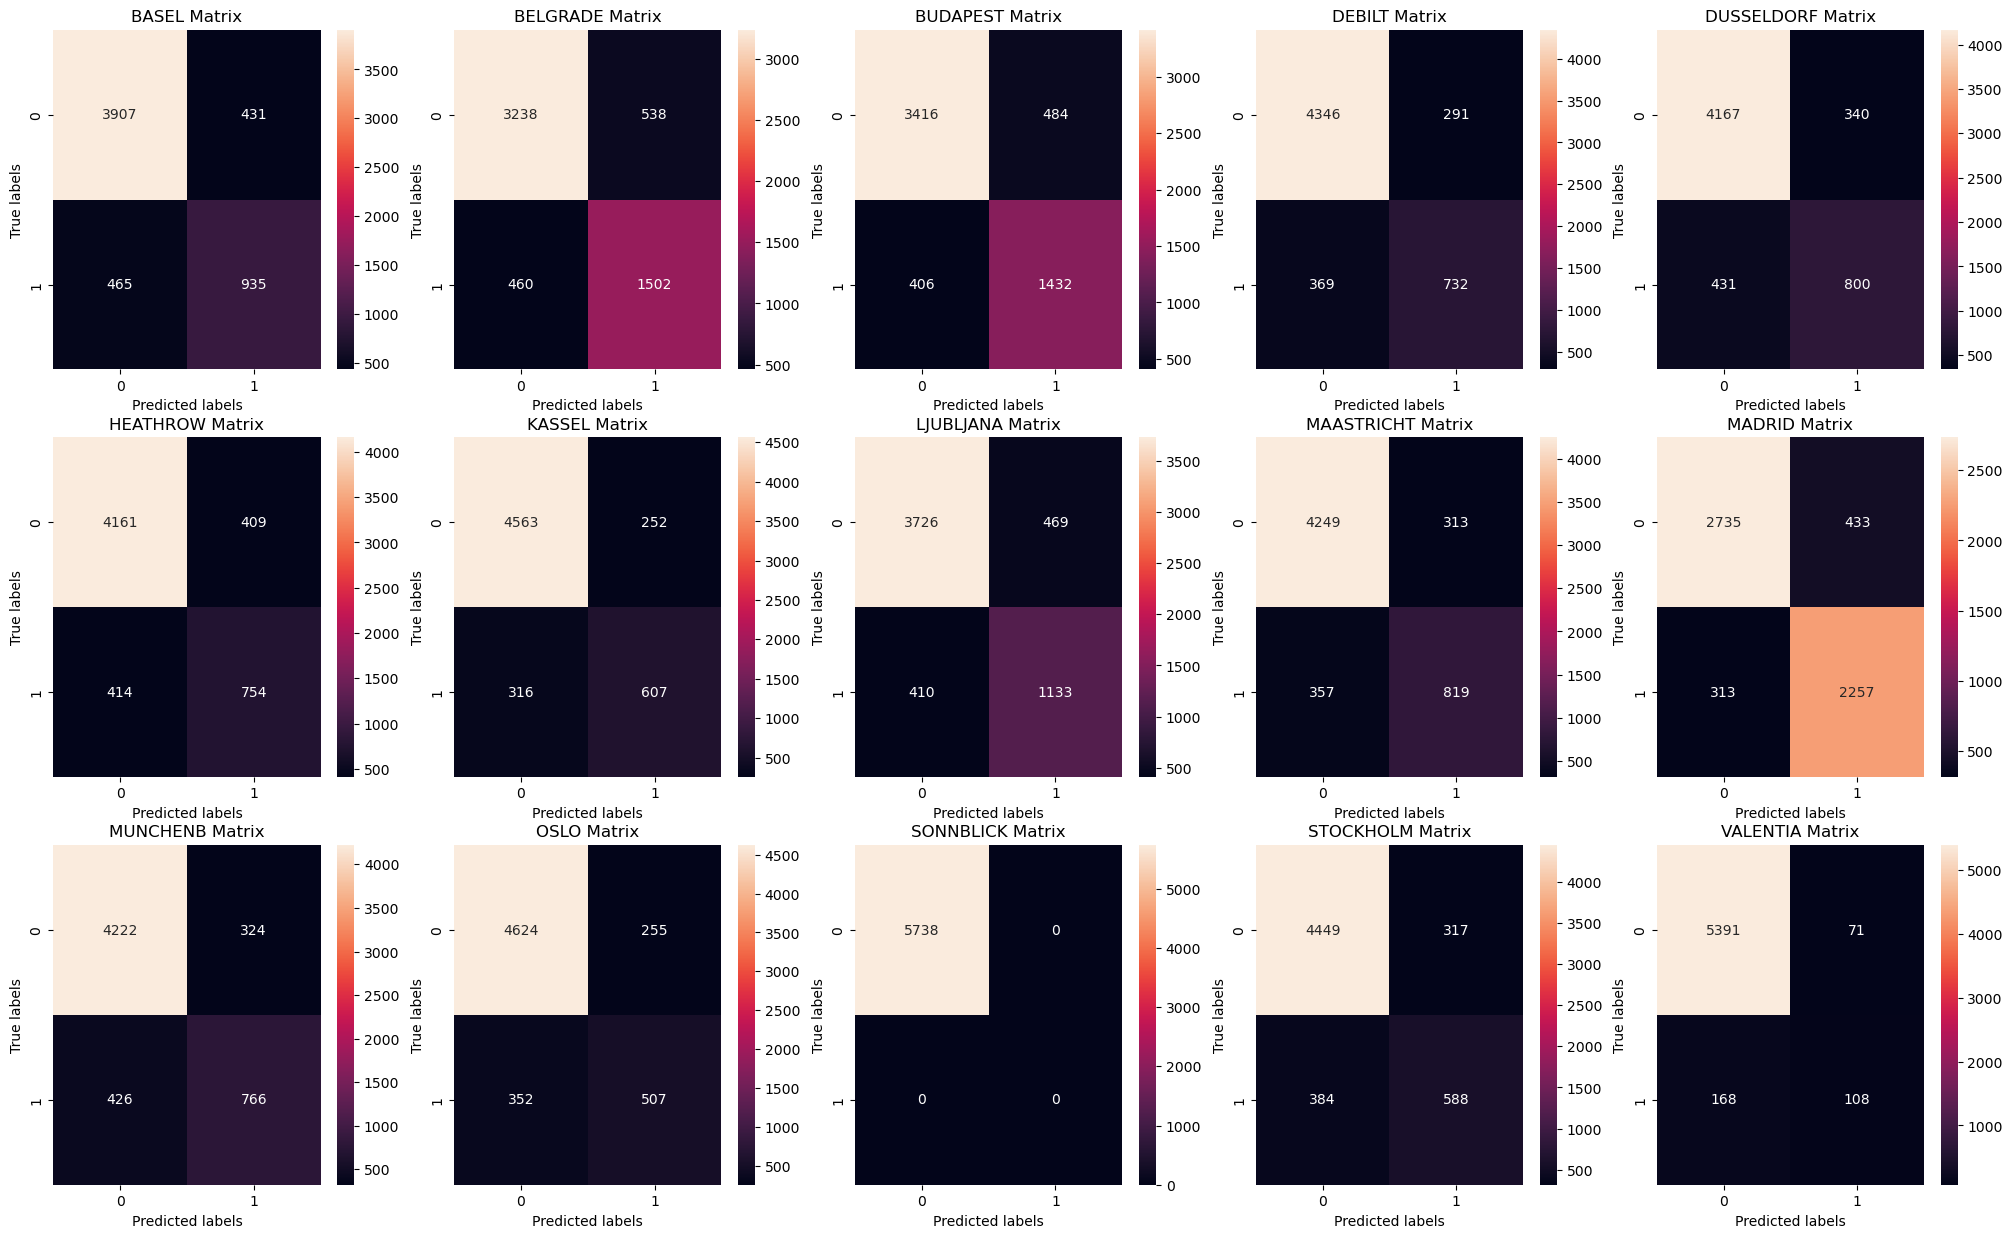

In [35]:
# Create and display confusion matrices for multiple weather stations:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name+key], y_pred[:, count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [39]:
from sklearn.metrics import accuracy_score

# Initialize a dictionary to store accuracy for each station
accuracy_dict = {}

# Define key for your target column
key = "_pleasant_weather"

# Loop through all locations (stations)
for name in locations:
    y_true = y_test[name + key]        
    y_pred_station = y_pred[:, locations.index(name)]
    acc = accuracy_score(y_true, y_pred_station)      
    accuracy_dict[name] = round(acc*100)  # Round to nearest whole number

# Display accuracy for each station
for station, acc in accuracy_dict.items():
    print(f"{station}: {acc}%")

BASEL: 84%
BELGRADE: 83%
BUDAPEST: 84%
DEBILT: 88%
DUSSELDORF: 87%
HEATHROW: 86%
KASSEL: 90%
LJUBLJANA: 85%
MAASTRICHT: 88%
MADRID: 87%
MUNCHENB: 87%
OSLO: 89%
SONNBLICK: 100%
STOCKHOLM: 88%
VALENTIA: 96%


In [41]:

# Calculate the average accuracy across all stations
average_accuracy = round(np.mean(list(accuracy_dict.values())))
print(f"\nAverage Accuracy Across All Stations: {average_accuracy}%")


Average Accuracy Across All Stations: 88%
